# Procesado inicial

## Limpieza y procesado

Como este apartado se realizo en la primera entrega "MD005_DidacPiferrerIglesias_Agrupacion.ipynb" se colocará una celda completa que realice todas las limpieza y operaciones.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

C:\Users\Didac\AppData\Local\Temp\ipykernel_20652\1932699180.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### Primera limpieza generica y formateo de los datos (mismos procesos que en la primera entrega)

In [2]:
df = pd.read_csv("global-economy-indicators/Global Economy Indicators.csv")
df.columns=df.columns.str.strip()

#Vamos a crear un diccionario que nos asocie los nombre originales con los nuevos nombres abreviados
data_names = {}
for col in df.columns:
    primeras_letras = []
    for palabra in col.split():
        if palabra[0] == "(": #Aqui podemos añadir más caracteres que queramos para nuestro diccionario
            break
        else:
            if len(col.split()) > 1:
                primeras_letras.append(palabra[0])
            else:
                primeras_letras.append(palabra)

    key = ''.join(primeras_letras)
    data_names[key] = col
if len(set(data_names)) == len(data_names):
    print("Ready to create a dictionary:")
    print(data_names)
else:
    pass
    #Aquí deberíamos, en caso de que fuera necesario, separar los elementos que son iguales, y añadirles distintos valores hasta hacerlos únicos.

#definimos una función que nos permita obtener el valor del diccionario a traves del valor del diccionario
def get_key_from_value(diccionario,value):
    for k,v in diccionario.items():
        if v == value:
            return k
    return "None" #si el valor no se encuentra

#Renombramos todas las cabeceras de las columnas con los nuevos nombres
for col in df.columns:
    new_name = get_key_from_value(data_names,col)
    df.rename(columns = {col: new_name},inplace=True)

if not "None" in df.columns: print("Rename Succesfull")

#Tenemos espacios extras, por lo tanto tenemos que limpiar también estos datos
df['Country']=df['Country'].str.strip()
df['Currency']=df['Currency'].str.strip()

#Prevenir malos formatos en los numeros
for col in df.select_dtypes(['float64']):
    df[col]=pd.to_numeric(df[col])
df


Ready to create a dictionary:
{'CountryID': 'CountryID', 'Country': 'Country', 'Year': 'Year', 'Aer': 'AMA exchange rate', 'Iber': 'IMF based exchange rate', 'Population': 'Population', 'Currency': 'Currency', 'PcG': 'Per capita GNI', 'Ahff': 'Agriculture, hunting, forestry, fishing (ISIC A-B)', 'Cii': 'Changes in inventories', 'C': 'Construction (ISIC F)', 'Eogas': 'Exports of goods and services', 'Fce': 'Final consumption expenditure', 'Ggfce': 'General government final consumption expenditure', 'Gcf': 'Gross capital formation', 'Gfcf': 'Gross fixed capital formation (including Acquisitions less disposals of valuables)', 'Hce': 'Household consumption expenditure (including Non-profit institutions serving households)', 'Iogas': 'Imports of goods and services', 'M': 'Manufacturing (ISIC D)', 'MMU': 'Mining, Manufacturing, Utilities (ISIC C-E)', 'OA': 'Other Activities (ISIC J-P)', 'TVA': 'Total Value Added', 'Tsac': 'Transport, storage and communication (ISIC I)', 'Wrtrah': 'Wholesale,

,CountryID,Country,Year,Aer,Iber,Population,Currency,PcG,Ahff,Cii,...,Hce,Iogas,M,MMU,OA,TVA,Tsac,Wrtrah,GNIiU,GDP
0,4,Afghanistan,1970,0.044998,0.044998,10752971,Afghani,164,8.699174e+08,NaN,...,1.551094e+09,1.952772e+08,3.701468e+08,3.766908e+08,1.277478e+08,1.731454e+09,8.391720e+07,2.263871e+08,1.766528e+09,1.731436e+09
1,4,Afghanistan,1971,0.044998,0.044998,11015857,Afghani,168,9.108281e+08,NaN,...,1.675426e+09,2.762965e+08,3.875495e+08,3.944012e+08,1.337541e+08,1.812857e+09,8.786038e+07,2.370192e+08,1.850122e+09,1.812838e+09
2,4,Afghanistan,1972,0.044998,0.044998,11286753,Afghani,149,8.279453e+08,NaN,...,1.498812e+09,2.903704e+08,3.522847e+08,3.585129e+08,1.215827e+08,1.647918e+09,7.986452e+07,2.154773e+08,1.683948e+09,1.647900e+09
3,4,Afghanistan,1973,0.044998,0.044998,11575305,Afghani,150,8.554869e+08,NaN,...,1.508024e+09,2.629629e+08,3.640103e+08,3.704458e+08,1.256302e+08,1.702735e+09,8.252888e+07,2.226243e+08,1.739998e+09,1.702716e+09
4,4,Afghanistan,1974,0.044998,0.044998,11869879,Afghani,177,1.035913e+09,NaN,...,1.778819e+09,3.056792e+08,4.407604e+08,4.485528e+08,1.521192e+08,2.061752e+09,9.991860e+07,2.695259e+08,2.106420e+09,2.061729e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10507,894,Zambia,2017,9.519501,9.519501,17298054,Kwacha,1448,1.041005e+09,567729313.0,...,1.215309e+10,9.465895e+09,2.102369e+09,7.194153e+09,6.187124e+09,2.416662e+10,1.965026e+09,5.323590e+09,2.505604e+10,2.586816e+10
10508,894,Zambia,2018,10.458143,10.458143,17835893,Kwacha,1451,8.791160e+08,929063411.0,...,1.183200e+10,9.717269e+09,1.801783e+09,6.556884e+09,5.791375e+09,2.422570e+10,2.490720e+09,5.990720e+09,2.588455e+10,2.631198e+10
10509,894,Zambia,2019,12.889418,12.889418,18380477,Kwacha,1246,6.668385e+08,817104395.0,...,9.848112e+09,7.961415e+09,1.582484e+09,5.584425e+09,5.231062e+09,2.153971e+10,2.537646e+09,4.959277e+09,2.291011e+10,2.331036e+10
10510,894,Zambia,2020,18.344093,18.344093,18927715,Kwacha,928,5.391694e+08,439295787.0,...,6.969267e+09,5.892353e+09,1.397303e+09,4.269405e+09,4.217431e+09,1.718020e+10,2.258715e+09,3.234123e+09,1.756233e+10,1.811064e+10


### Reducimos el dataset para clasificar

En este problema nos quedaremos una porción de datos diferentes, tal y como vimos en los problemas anteriores lo que sucedía era que nos guardabamos datos a lo largo del tiempo, y no permitia bien la clasificación, así que esta vez, en vez de coger un período de 12 años, vamos a coger la mitad. Así que en lugar de quedarnos con los paises que tengan todas las entradas, nos quedaremos con aquellos que tengan del 2016 en adelante. Y probaremos con la misma asumción de la entrega anterior y escogeremos simplemente 10 paises top.

In [3]:
df_f = df[df['Year'] > 2015]
df_f

,CountryID,Country,Year,Aer,Iber,Population,Currency,PcG,Ahff,Cii,...,Hce,Iogas,M,MMU,OA,TVA,Tsac,Wrtrah,GNIiU,GDP
46,4,Afghanistan,2016,67.866086,67.866086,34636207,Afghani,525,4.638291e+09,NaN,...,1.444640e+10,5.841752e+09,7.413601e+08,1.296204e+09,7.073713e+09,1.716008e+10,1.583227e+09,1.978781e+09,1.819913e+10,1.801956e+10
47,4,Afghanistan,2017,68.026904,68.026904,35643418,Afghani,537,4.992454e+09,NaN,...,1.391303e+10,6.029924e+09,6.671211e+08,1.304544e+09,7.199680e+09,1.791394e+10,1.574009e+09,2.248362e+09,1.914502e+10,1.889635e+10
48,4,Afghanistan,2018,72.083247,72.083247,36686784,Afghani,507,4.060048e+09,NaN,...,1.630358e+10,7.400610e+09,1.134634e+09,1.802054e+09,7.232891e+09,1.748088e+10,1.601011e+09,2.121150e+09,1.861026e+10,1.841885e+10
49,4,Afghanistan,2019,77.737949,77.737949,37769499,Afghani,508,4.872438e+09,NaN,...,1.807539e+10,8.251464e+09,1.331477e+09,2.073301e+09,6.907645e+09,1.801690e+10,1.503540e+09,2.075666e+09,1.920501e+10,1.890449e+10
50,4,Afghanistan,2020,76.813536,76.813536,38972230,Afghani,522,5.402592e+09,NaN,...,1.899194e+10,6.983058e+09,1.546263e+09,2.206409e+09,7.098671e+09,1.924517e+10,1.929933e+09,1.987511e+09,2.033238e+10,2.014344e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10507,894,Zambia,2017,9.519501,9.519501,17298054,Kwacha,1448,1.041005e+09,567729313.0,...,1.215309e+10,9.465895e+09,2.102369e+09,7.194153e+09,6.187124e+09,2.416662e+10,1.965026e+09,5.323590e+09,2.505604e+10,2.586816e+10
10508,894,Zambia,2018,10.458143,10.458143,17835893,Kwacha,1451,8.791160e+08,929063411.0,...,1.183200e+10,9.717269e+09,1.801783e+09,6.556884e+09,5.791375e+09,2.422570e+10,2.490720e+09,5.990720e+09,2.588455e+10,2.631198e+10
10509,894,Zambia,2019,12.889418,12.889418,18380477,Kwacha,1246,6.668385e+08,817104395.0,...,9.848112e+09,7.961415e+09,1.582484e+09,5.584425e+09,5.231062e+09,2.153971e+10,2.537646e+09,4.959277e+09,2.291011e+10,2.331036e+10
10510,894,Zambia,2020,18.344093,18.344093,18927715,Kwacha,928,5.391694e+08,439295787.0,...,6.969267e+09,5.892353e+09,1.397303e+09,4.269405e+09,4.217431e+09,1.718020e+10,2.258715e+09,3.234123e+09,1.756233e+10,1.811064e+10


### Limpieza de nulos y partición del dataset

In [4]:
df_f.isna().sum()

CountryID       0
Country         0
Year            0
Aer             0
Iber            0
Population      0
Currency        0
PcG             0
Ahff           18
Cii           234
C               0
Eogas           0
Fce             0
Ggfce           6
Gcf             6
Gfcf            6
Hce             6
Iogas           0
M               0
MMU             0
OA              0
TVA             0
Tsac            3
Wrtrah          3
GNIiU           0
GDP             0
dtype: int64

In [5]:
#A continuación vamnos a ver, teniendo en cuenta los nulos, como de equilibrado esta el dataset a nivel tanto de paises
for country,count in df_f['Country'].value_counts().items():
    print(country + ": " + str(count))

#Y comprobamos que todos los paises con los que nos hemos quedado tienen los 6 años y que no falta ninguno de por medio ni al final.

Afghanistan: 6
Aruba: 6
New Caledonia: 6
Vanuatu: 6
New Zealand: 6
Nicaragua: 6
Niger: 6
Nigeria: 6
Norway: 6
Micronesia (FS of): 6
Marshall Islands: 6
Palau: 6
Pakistan: 6
Panama: 6
Papua New Guinea: 6
Paraguay: 6
Peru: 6
Philippines: 6
Poland: 6
Portugal: 6
Guinea-Bissau: 6
Timor-Leste: 6
Puerto Rico: 6
Qatar: 6
Romania: 6
Sint Maarten (Dutch part): 6
Curaçao: 6
Albania: 6
Netherlands: 6
Lithuania: 6
Luxembourg: 6
China, Macao SAR: 6
Madagascar: 6
Malawi: 6
Malaysia: 6
Maldives: 6
Mali: 6
Malta: 6
Mauritania: 6
Mauritius: 6
Mexico: 6
Monaco: 6
Mongolia: 6
Republic of Moldova: 6
Montenegro: 6
Montserrat: 6
Morocco: 6
Mozambique: 6
Oman: 6
Namibia: 6
Nauru: 6
Nepal: 6
Russian Federation: 6
Rwanda: 6
Saint Kitts and Nevis: 6
Anguilla: 6
Togo: 6
Tonga: 6
Trinidad and Tobago: 6
United Arab Emirates: 6
Tunisia: 6
Türkiye: 6
Turkmenistan: 6
Turks and Caicos Islands: 6
Tuvalu: 6
Uganda: 6
Ukraine: 6
North Macedonia: 6
Egypt: 6
United Kingdom: 6
U.R. of Tanzania: Mainland: 6
Zanzibar: 6
Unite

En esta entrega eliminaremos los paises que contengan estos nulos simplemente para mantener las variables que en el anterior dataset se eliminaron y analizar el comportamiento y la correlación de estas variables que contienen nulos, su correlación y su comportamiento con el resto de países. Los países omo Monaco, San Martin , etc. No afectaran puesto que no son potencias mundiales.

Por otro lado, la variables Cii si que la eliminaremos ya que se encuentra presente en la mayoria de los países.

In [6]:
#China, Macao SAR
#Monaco
#Sint Maarten (Dutch part)
#D.P.R. of Korea
#Kiribati

#wsc (without some countries)
dicc_pais = dict(zip(df_f['CountryID'], df_f['Country']))
print(dicc_pais)
countries_to_delete = ['China, Macao SAR','Monaco','Sint Maarten (Dutch part)','D.P.R. of Korea','Kiribati']

#también de igual forma que en la anterior entrega una vez creado nuestro diccionario, podemos eliminar las variables categoricas Currency y Country
df_wsc = df_f[~df_f['Country'].isin(countries_to_delete)].drop(['Cii','Country','Currency'], axis = 1)
df_wsc.isna().sum()



{4: 'Afghanistan', 8: 'Albania', 12: 'Algeria', 20: 'Andorra', 24: 'Angola', 28: 'Antigua and Barbuda', 31: 'Azerbaijan', 32: 'Argentina', 36: 'Australia', 40: 'Austria', 44: 'Bahamas', 48: 'Bahrain', 50: 'Bangladesh', 51: 'Armenia', 52: 'Barbados', 56: 'Belgium', 60: 'Bermuda', 64: 'Bhutan', 68: 'Bolivia (Plurinational State of)', 70: 'Bosnia and Herzegovina', 72: 'Botswana', 76: 'Brazil', 84: 'Belize', 90: 'Solomon Islands', 92: 'British Virgin Islands', 96: 'Brunei Darussalam', 100: 'Bulgaria', 104: 'Myanmar', 108: 'Burundi', 112: 'Belarus', 116: 'Cambodia', 120: 'Cameroon', 124: 'Canada', 132: 'Cabo Verde', 136: 'Cayman Islands', 140: 'Central African Republic', 144: 'Sri Lanka', 148: 'Chad', 152: 'Chile', 156: 'China', 170: 'Colombia', 174: 'Comoros', 178: 'Congo', 180: 'D.R. of the Congo', 184: 'Cook Islands', 188: 'Costa Rica', 191: 'Croatia', 192: 'Cuba', 196: 'Cyprus', 203: 'Czechia', 204: 'Benin', 208: 'Denmark', 212: 'Dominica', 214: 'Dominican Republic', 218: 'Ecuador', 222

CountryID     0
Year          0
Aer           0
Iber          0
Population    0
PcG           0
Ahff          0
C             0
Eogas         0
Fce           0
Ggfce         0
Gcf           0
Gfcf          0
Hce           0
Iogas         0
M             0
MMU           0
OA            0
TVA           0
Tsac          0
Wrtrah        0
GNIiU         0
GDP           0
dtype: int64

Realizamos la matriz de correlaciones de nuestras variables numericas con nuestro nuevo dataset (aún sin quedarnos con los 20 países)

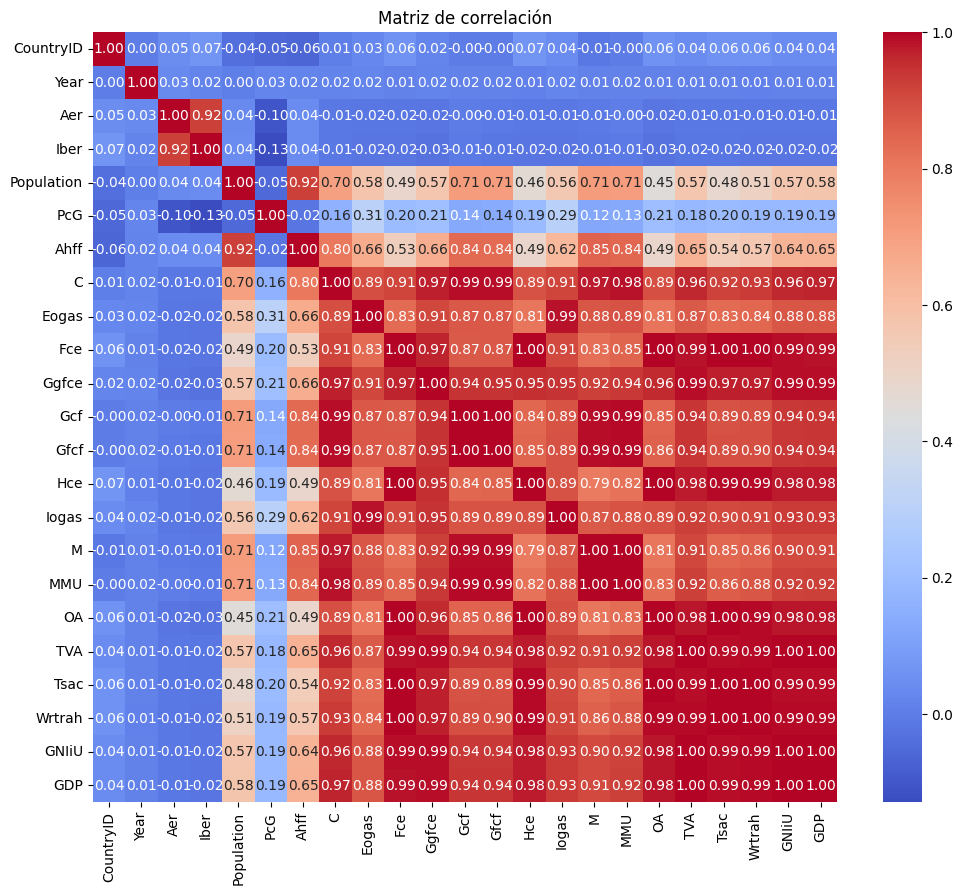

{'CountryID': 'CountryID', 'Country': 'Country', 'Year': 'Year', 'Aer': 'AMA exchange rate', 'Iber': 'IMF based exchange rate', 'Population': 'Population', 'Currency': 'Currency', 'PcG': 'Per capita GNI', 'Ahff': 'Agriculture, hunting, forestry, fishing (ISIC A-B)', 'Cii': 'Changes in inventories', 'C': 'Construction (ISIC F)', 'Eogas': 'Exports of goods and services', 'Fce': 'Final consumption expenditure', 'Ggfce': 'General government final consumption expenditure', 'Gcf': 'Gross capital formation', 'Gfcf': 'Gross fixed capital formation (including Acquisitions less disposals of valuables)', 'Hce': 'Household consumption expenditure (including Non-profit institutions serving households)', 'Iogas': 'Imports of goods and services', 'M': 'Manufacturing (ISIC D)', 'MMU': 'Mining, Manufacturing, Utilities (ISIC C-E)', 'OA': 'Other Activities (ISIC J-P)', 'TVA': 'Total Value Added', 'Tsac': 'Transport, storage and communication (ISIC I)', 'Wrtrah': 'Wholesale, retail trade, restaurants and

In [7]:
plt.figure(figsize=(12, 10))
sns.heatmap(df_wsc.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación')
plt.show()
print(data_names)

In [8]:
def wp_calculation(country):
    if country in top10:
        return 1 #True
    else:
        return 0 #False

#Seleccionamos las 10 potencias en los últimos 6 años del dataset
media_GDP = df_wsc.groupby('CountryID')['GDP'].mean()
top10 = media_GDP.nlargest(10)
print(top10)
df_wsc['WP'] = df_wsc['CountryID'].apply(wp_calculation)

#creamos las llaves disponibles que tenemos que no forman parte del top10
random.seed(42)
key_availables = [key for key in dicc_pais.keys() if key not in top10]

non_wp = random.sample(key_availables,10)

#a continuación vamos a extrer los countryID del top10 y los vamos a juntar con los otros seleccionados

wp_keys = [key for key,val in top10.items()]

total_wp_nonwp = non_wp + wp_keys
total_wp_nonwp

df_fy_final = df_wsc[df_wsc['CountryID'].isin(total_wp_nonwp)]


df_fy_final.info()

CountryID
840    2.075000e+13
156    1.401667e+13
392    5.011667e+12
276    3.861667e+12
826    2.825000e+12
356    2.731667e+12
250    2.698333e+12
380    1.991667e+12
76     1.786667e+12
124    1.713333e+12
Name: GDP, dtype: float64
<class 'pandas.core.frame.DataFrame'>
Index: 120 entries, 338 to 10144
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CountryID   120 non-null    int64  
 1   Year        120 non-null    int64  
 2   Aer         120 non-null    float64
 3   Iber        120 non-null    float64
 4   Population  120 non-null    int64  
 5   PcG         120 non-null    int64  
 6   Ahff        120 non-null    float64
 7   C           120 non-null    float64
 8   Eogas       120 non-null    float64
 9   Fce         120 non-null    float64
 10  Ggfce       120 non-null    float64
 11  Gcf         120 non-null    float64
 12  Gfcf        120 non-null    float64
 13  Hce         120 non-null    float64
 14 

## Analizamos el nuevo dataset

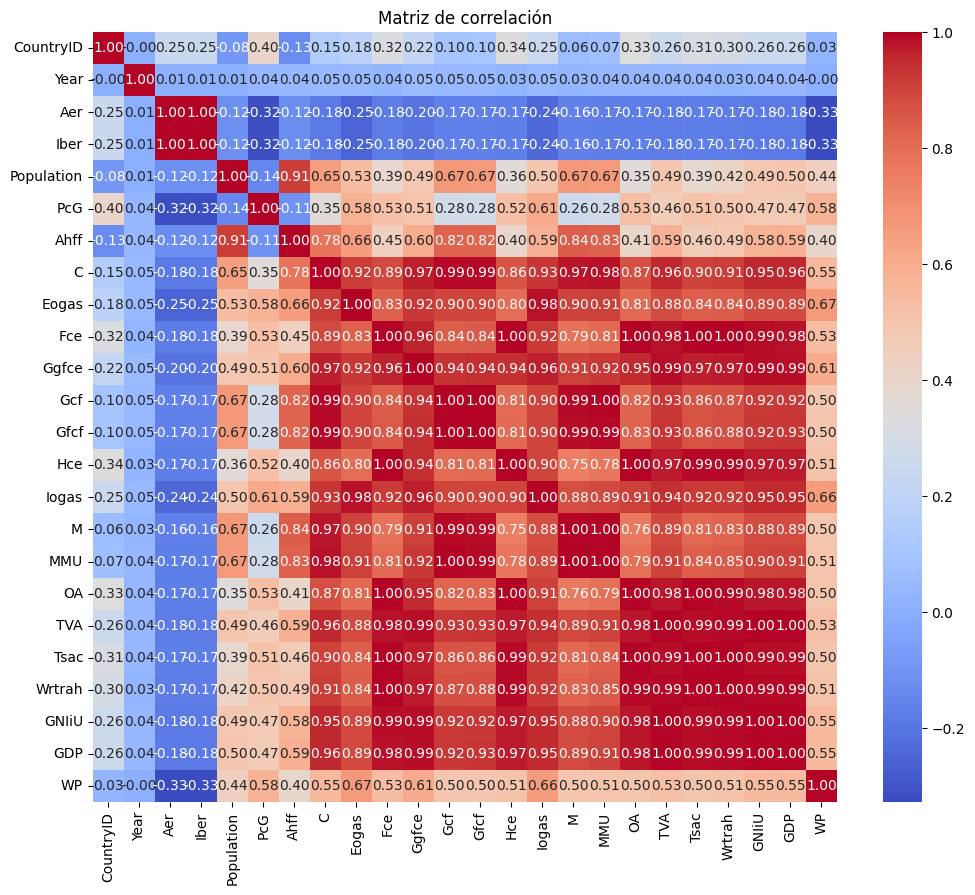

{'CountryID': 'CountryID', 'Country': 'Country', 'Year': 'Year', 'Aer': 'AMA exchange rate', 'Iber': 'IMF based exchange rate', 'Population': 'Population', 'Currency': 'Currency', 'PcG': 'Per capita GNI', 'Ahff': 'Agriculture, hunting, forestry, fishing (ISIC A-B)', 'Cii': 'Changes in inventories', 'C': 'Construction (ISIC F)', 'Eogas': 'Exports of goods and services', 'Fce': 'Final consumption expenditure', 'Ggfce': 'General government final consumption expenditure', 'Gcf': 'Gross capital formation', 'Gfcf': 'Gross fixed capital formation (including Acquisitions less disposals of valuables)', 'Hce': 'Household consumption expenditure (including Non-profit institutions serving households)', 'Iogas': 'Imports of goods and services', 'M': 'Manufacturing (ISIC D)', 'MMU': 'Mining, Manufacturing, Utilities (ISIC C-E)', 'OA': 'Other Activities (ISIC J-P)', 'TVA': 'Total Value Added', 'Tsac': 'Transport, storage and communication (ISIC I)', 'Wrtrah': 'Wholesale, retail trade, restaurants and

In [9]:
#Realizamos otra vez la matriz de correlación
plt.figure(figsize=(12, 10))
sns.heatmap(df_fy_final.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación')
plt.show()
print(data_names)

En este nuevo dataset final, vemos como ahora la correlación que aparece en las variables Aer/Iber con el resto de variables numerica que aportan a la economia es una correlación negativa, puesto que a mayor sea la tasa de conversión, es decir, contra más devaluada este la moneda respecto la moneda internacional (USD), es más probable que el país sea menos rico y, por lo tanto, menos potente economicamente. Vemos tambien como la correlacion de la variable PcG respecto las economicas ha subido también debido a que el dataset ahora es más extremo, puesto que se han cogido las 10 potencias mundiales de los últimos 6 años, y del resto de países que faltan, se han cogido 10 de forma aleatoria, hay ciertas probabilidades de que alguno de estos 10 paises no potencias mundiales, sea alguno tercer mundista.

Además, no es casulaidad, que la media de las 10 potencias mundiales en los últimos 6 años, coincida con la media de las 10 potencias mundiales que se categorizaron en los últimos 12 años. Puesto que del 2010 al 2021 no ha habido ningún impacto a nivel global que pueda afectar la economia. Otra cosa distinta hubiera sido que tuvieramos datos hasta el día de hoy, donde han sucedido eventos como el Covid y la guerra de Rusia con Ucrania, los cuales han efectado a la economia globalmente. 

In [10]:
#Visualizamos la matriz de correlación para obtener más información

#Comentado para que no tarde 2m cada vez que se resetea el kernel

#plt.figure(figsize = (5, 20))
#sns.pairplot(df_fy_final, height=2, hue = 'WP',palette = "tab10")
#plt.show()

Para poder analizar bien todas las correlaciones, se ha descargado la figura y a traves del zoom se ha podido ir analizando las diferentes distribuciones, y es que aparentemente con la nueva variable que en el anterior dataset eliminamos (Ahff) junto con la Aer, se pueden llegar a discernir bien dos grupos. (Seria interesante a futuro probar con estas dos variables como agrupa con DBSCAN, que fue el que dió mejores resultados en la entrega anterior.)

In [11]:
df_fy_final.describe()

,CountryID,Year,Aer,Iber,Population,PcG,Ahff,C,Eogas,Fce,...,Iogas,M,MMU,OA,TVA,Tsac,Wrtrah,GNIiU,GDP,WP
count,120.000000,120.000000,120.000000,120.000000,1.200000e+02,120.000000,1.200000e+02,1.200000e+02,1.200000e+02,1.200000e+02,...,1.200000e+02,1.200000e+02,1.200000e+02,1.200000e+02,1.200000e+02,1.200000e+02,1.200000e+02,1.200000e+02,1.200000e+02,120.000000
mean,360.050000,2018.500000,291.751427,291.751427,1.966322e+08,21248.033333,1.034071e+11,1.535984e+11,6.045880e+11,2.123702e+12,...,6.102070e+11,4.792065e+11,5.878492e+11,1.329924e+12,2.810767e+12,2.592422e+11,3.772723e+11,2.928769e+12,2.903417e+12,0.500000
std,270.642648,1.714986,835.394550,835.394550,4.092886e+08,21418.954128,2.507496e+11,2.729601e+11,7.991330e+11,3.917241e+12,...,8.321867e+11,9.457858e+11,1.136045e+12,2.627326e+12,5.213705e+12,5.084495e+11,7.183030e+11,5.270803e+12,5.208252e+12,0.502096
min,31.000000,2016.000000,0.727065,0.727065,1.082800e+04,769.000000,4.449059e+06,4.534595e+06,5.648760e+06,6.643054e+07,...,4.411260e+07,1.376380e+05,8.369230e+05,2.155791e+07,3.933411e+07,2.007116e+06,5.426646e+06,7.880159e+07,4.125738e+07,0.000000
25%,142.000000,2017.000000,1.190408,1.190408,9.909214e+06,4117.500000,3.270493e+09,2.606483e+09,1.168544e+10,3.035066e+10,...,1.231993e+10,4.419536e+09,1.105111e+10,6.559810e+09,3.734045e+10,2.948722e+09,4.727719e+09,3.884545e+10,4.016517e+10,0.000000
50%,272.000000,2018.500000,2.089582,2.089582,4.887306e+07,7970.500000,1.610704e+10,3.313952e+10,3.810000e+11,6.910000e+11,...,3.745000e+11,1.178313e+11,1.620089e+11,3.895000e+11,8.275000e+11,7.152564e+10,1.301302e+11,8.845000e+11,9.235000e+11,0.500000
75%,469.500000,2020.000000,22.081183,22.081183,9.370955e+07,41795.000000,4.923895e+10,1.595000e+11,8.030000e+11,2.237500e+12,...,8.270000e+11,3.222500e+11,3.980000e+11,1.367500e+12,2.520000e+12,2.432500e+11,3.182500e+11,2.825000e+12,2.805000e+12,1.000000
max,840.000000,2021.000000,3727.071722,3727.071722,1.425893e+09,70081.000000,1.350000e+12,1.240000e+12,3.530000e+12,1.930000e+13,...,3.400000e+12,4.870000e+12,5.780000e+12,1.290000e+13,2.330000e+13,2.490000e+12,3.520000e+12,2.360000e+13,2.330000e+13,1.000000


## Clasificación

### Regresión logistica

Debido a que tenemos un escenario con dos posibles soluciones, este algoritmo será el primero que se pruebe.

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

mydf_rl = df_fy_final

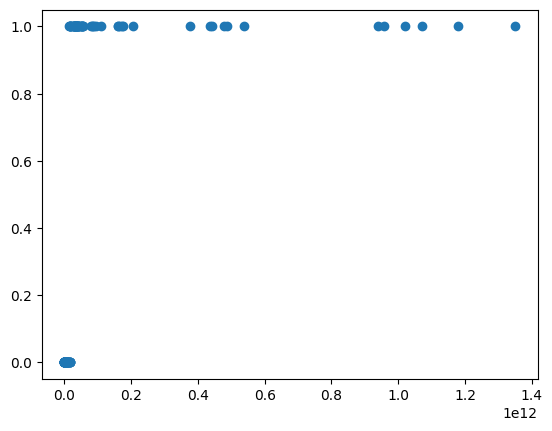

In [13]:
plt.scatter(mydf_rl['Ahff'], mydf_rl['WP'])

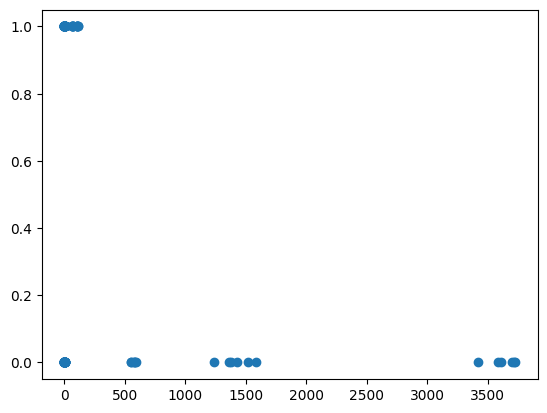

In [14]:
plt.scatter(mydf_rl['Aer'], mydf_rl['WP'])

Primero entrenaremos el modelo de regresión logistica con las variables que se han escogido, y después se investigará cual es el mejor treshold.

In [15]:
#antes de realizar nada, eliminamos nuestra variable CountryID que todo y que sea numerica es un ID asignado por el dataset que solo añade ruido al dataset.
mydf_rl = mydf_rl.drop(['CountryID'],axis=1)

Accuracy: 0.96

Confusion Matrix:

Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        12
           1       1.00      0.92      0.96        12

    accuracy                           0.96        24
   macro avg       0.96      0.96      0.96        24
weighted avg       0.96      0.96      0.96        24



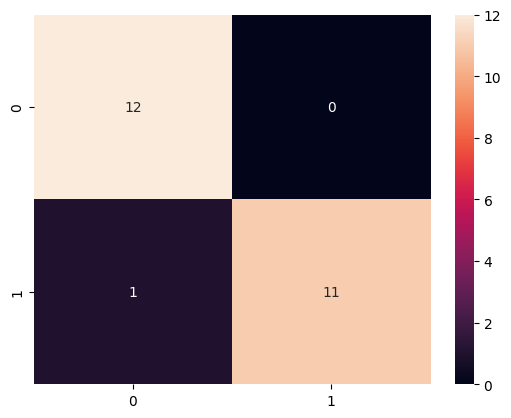

In [16]:
twoVar = ['Ahff', 'Aer', 'WP']
mydf = mydf_rl[twoVar]

X = mydf.iloc[:, :-1] #cogemos todas las columnas, excepto la última
y = mydf.iloc[:, -1] #cogemos solo la útlima columna

# Scaler to avoid the error
scaler = StandardScaler()

X = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
sns.heatmap(conf_matrix, annot = True)
print("\nClassification Report:")
print(classification_rep)



Se ve a continuación que si utilizamos las variables que se han asignado de forma manual, solo obtenemos un fallo en la clasificación lo que se puede considerar un resultado bastante bueno. 

In [17]:
#Se crea esta funcion para encontrar cual es el mejor treshold y por consiguiente el mejor numero de variables para generalizar el problema
def regresion_log(df,treshold):
    
    high_corr = abs(df.corr()['WP']) >= treshold
    high_corr_keys = [k for k, v in zip(high_corr.keys(), high_corr.values) if abs(v) >= treshold]
    df = df[high_corr_keys]

    X = df.iloc[:, :-1] #cogemos todas las columnas, excepto la última
    y = df.iloc[:, -1] #cogemos solo la útlima columna

    scaler = StandardScaler()

    if len(X.columns) == 0:
        var = False
        return var

    X = scaler.fit_transform(X)

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize and train the logistic regression model
    model = LogisticRegression(random_state=42)
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)

    # Print the results
    print(f"Accuracy: {accuracy:.2f} | treshold {treshold:.2f}")
    return True

In [18]:
for i in range(1,100,1):
    treshold = i/100
    booleano = regresion_log(mydf_rl,treshold=treshold)
    if booleano == False:
        break

Accuracy: 1.00 | treshold 0.01
Accuracy: 1.00 | treshold 0.02
Accuracy: 1.00 | treshold 0.03
Accuracy: 1.00 | treshold 0.04
Accuracy: 1.00 | treshold 0.05
Accuracy: 1.00 | treshold 0.06
Accuracy: 1.00 | treshold 0.07
Accuracy: 1.00 | treshold 0.08
Accuracy: 1.00 | treshold 0.09
Accuracy: 1.00 | treshold 0.10
Accuracy: 1.00 | treshold 0.11
Accuracy: 1.00 | treshold 0.12
Accuracy: 1.00 | treshold 0.13
Accuracy: 1.00 | treshold 0.14
Accuracy: 1.00 | treshold 0.15
Accuracy: 1.00 | treshold 0.16
Accuracy: 1.00 | treshold 0.17
Accuracy: 1.00 | treshold 0.18
Accuracy: 1.00 | treshold 0.19
Accuracy: 1.00 | treshold 0.20
Accuracy: 1.00 | treshold 0.21
Accuracy: 1.00 | treshold 0.22
Accuracy: 1.00 | treshold 0.23
Accuracy: 1.00 | treshold 0.24
Accuracy: 1.00 | treshold 0.25
Accuracy: 1.00 | treshold 0.26
Accuracy: 1.00 | treshold 0.27
Accuracy: 1.00 | treshold 0.28
Accuracy: 1.00 | treshold 0.29
Accuracy: 1.00 | treshold 0.30
Accuracy: 1.00 | treshold 0.31
Accuracy: 1.00 | treshold 0.32
Accuracy

Con este codigo verificamos, que con un treshold del 0.5 podemos llegar a obtener un 100% de precisón. Las variables que participan en la generalización del modelo con un treshold del 0.5 hacia la variable objetivo WP son:

In [19]:
high_corr = abs(mydf_rl.corr()['WP']) >= 0.5
high_corr_keys = [k for k, v in zip(high_corr.keys(), high_corr.values) if abs(v) >= 0.5]
df_corr = mydf_rl[high_corr_keys]
df_corr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 120 entries, 338 to 10144
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PcG     120 non-null    int64  
 1   C       120 non-null    float64
 2   Eogas   120 non-null    float64
 3   Fce     120 non-null    float64
 4   Ggfce   120 non-null    float64
 5   Hce     120 non-null    float64
 6   Iogas   120 non-null    float64
 7   MMU     120 non-null    float64
 8   TVA     120 non-null    float64
 9   Wrtrah  120 non-null    float64
 10  GNIiU   120 non-null    float64
 11  GDP     120 non-null    float64
 12  WP      120 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 13.1 KB


### Árboles de decisión

In [20]:
import pandas as pd
import numpy as np
import pydot
import pydotplus

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from IPython.display import Image
from six import StringIO
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score,classification_report
from IPython.display import Image

In [21]:
mydf_ad = df_fy_final
mydf_ad = mydf_ad.drop(['CountryID'],axis=1)
X = mydf_ad.iloc[:, :-1]
y = mydf_ad.iloc[:, -1]

# Escalar los atributos
scaler = StandardScaler()
scaler.fit(X)

X_scaled = scaler.transform(X)

# Dividir en train y test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [22]:
model_params={
    'max_leaf_nodes':[50,100,500,5000],
    'min_samples_split':[2,4,6]
}

In [23]:
model = DecisionTreeClassifier(random_state=1234)
gscv = GridSearchCV(model, model_params, cv =3)
model_gs = gscv.fit(X_train, y_train)
print("Best: %f using %s" % (model_gs.best_score_,model_gs.best_params_))

Best: 1.000000 using {'max_leaf_nodes': 50, 'min_samples_split': 2}


In [24]:
#Optimum decision tree
model = DecisionTreeClassifier(max_leaf_nodes=50, min_samples_split=2, criterion='entropy')
model.fit(X_train,y_train)
prediction = model.predict(X_test)

In [25]:
list(map(str, mydf_ad['WP'].unique()))

['0', '1']

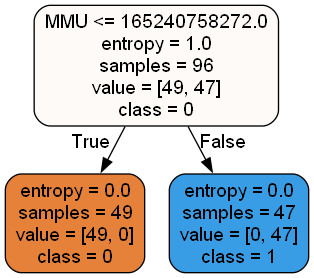

In [26]:
#Solo ejecutar esta celda si se tiene instalado graphviz
dot_data = StringIO()

export_graphviz(model,out_file=dot_data,filled=True, rounded=True,  class_names = list(map(str, mydf_ad['WP'].unique())),
                feature_names = mydf_ad.columns[:-1] )

graph = pydot.graph_from_dot_data(dot_data.getvalue())

Image(graph[0].create_png())

In [27]:
data_names['MMU']

'Mining, Manufacturing, Utilities (ISIC C-E)'

En el grafo de arriba, se puede observar como la variable que el árbol de decisión nos escoge es la MMU, la cual puede llegar a tener sentido puesto que al ser más potente en el sector de la industria afecta directamente proporcional al ser o no potencia mundial. A demás para el caso es cogido tiene mucho sentido, puesto que es simplemente realizar un punto de corte y sesgar. Es más esto nos lo indica la entropia, ya que en este contexto, la entropía se utiliza para cuantificar la impureza o la incertidumbre en el conjunto de datos, así pues, cuanto menor sea la entropía, más homogéneo es el conjunto de datos con respecto a la variable que se está prediciendo, en nuestro caso es totalmente heterogeno y se puede predecir correctamente.

### KNN

In [28]:
import altair as alt

### Modeling
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_predict

### Evaluación de resultados para un problema de clasificación
from sklearn.metrics import confusion_matrix,classification_report

In [36]:
mydf_knn = df_fy_final
mydf_knn = mydf_knn.drop(['CountryID'],axis=1)
X = mydf_knn.iloc[:, :-1]
y = mydf_knn.iloc[:, -1]

Hacemos algo que no habíamos hecho hasta ahora, y es normalizamos las variables y las graficamos en Boxpolots para ver como se comportan

In [39]:
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
df_scaled = pd.DataFrame(X_scaled, columns=[f'{i}' for i in X.columns])


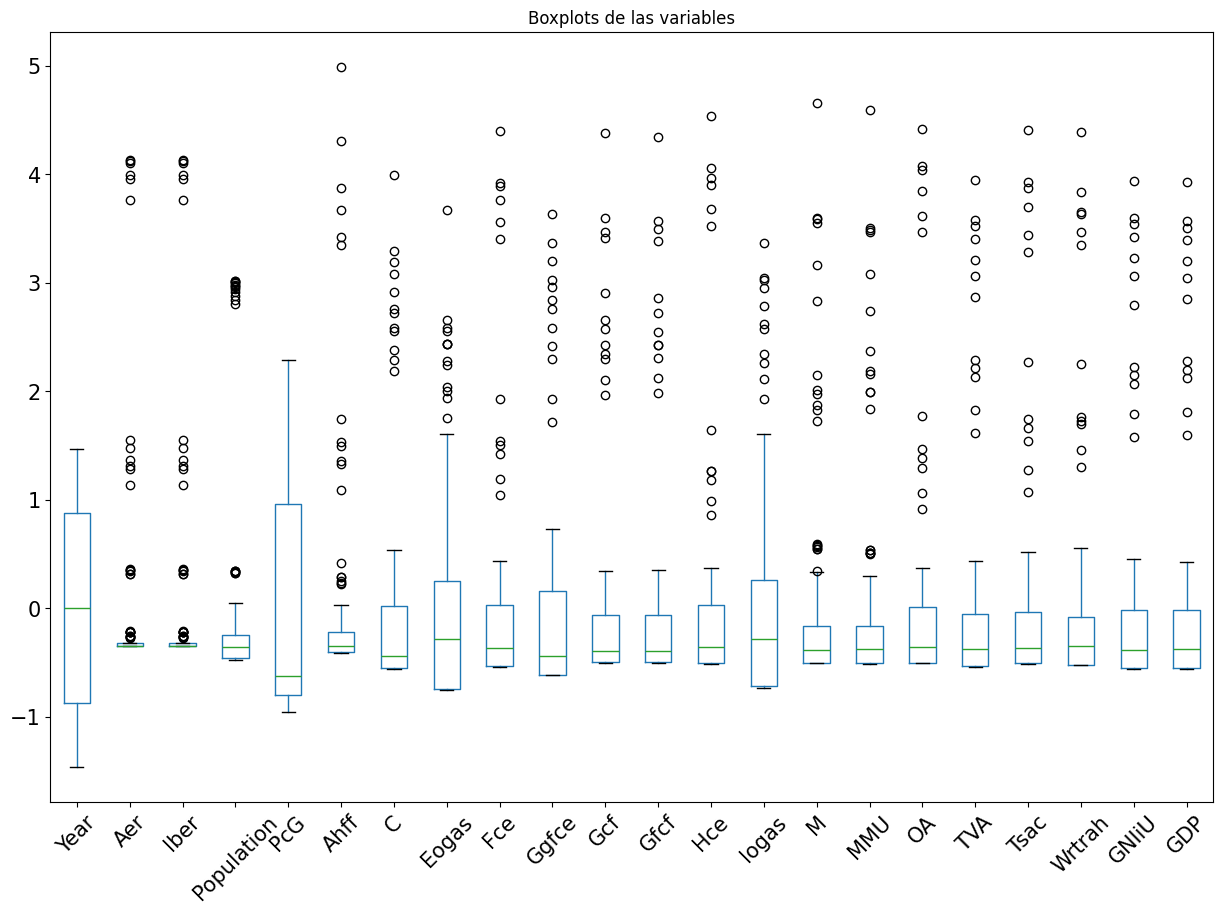

In [40]:
plt.figure(figsize = (15, 10))
plt.title("Boxplots de las variables")
df_scaled.boxplot(grid=False, rot=45, fontsize=15)
plt.show()

Es interesante observar que la variable PcG es la que tiene mayor variabilidad y como las variables Aer i Iber tienen una concentración de datos muy elevada y los que sobresalen se consideran outliers, esto puede ser a que hay muchos paises que se encuentran en la Unión Europea. De la misma manera que todos las potencias mundiales si o si, es decir la mitad del dataset se encuentran en esta concentración donde el la tasa de intercambio de la moneda esta equilibrado.

In [ ]:
#Dividir en train y test
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size=0.25,random_state=1234)

print("Tamaño dataset entrenamiento:",X_train.shape)
print("Tamaño dataset validación:",X_test.shape)

In [73]:
# K values
k_values = [2,4,6,8,10,20,40,50,60,70]

# Saving results
precisions = []
confusion_matrices = []
predictions = []

# Cross validation w/ diff K values
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)

    # 5-Fold Stratified Cross-Validation
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    y_pred = cross_val_predict(knn, X_train, y_train, cv=cv)

    # Confusion matrices
    cm = confusion_matrix(y_train, y_pred)
    confusion_matrices.append(cm)

    # Precision
    precision = np.mean(y_pred == y_train)
    precisions.append(precision)

    # Añadimos las predicciones para mostrarlas acorde con las matrices de confusión
    predictions.append(y_pred)


# Print results
count = 0
for k, precision, cm in zip(k_values, precisions, confusion_matrices):
    print(f"K-value: {k}")
    print("Accuracy:", precision)
    print("Confusion matrix:")
    print(cm)
    print()
    print(classification_report(y_train, predictions[count]))
    print("="*50)
    count = count + 1


K-value: 2
Accuracy: 1.0
Confusion matrix:
[[49  0]
 [ 0 47]]

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        49
           1       1.00      1.00      1.00        47

    accuracy                           1.00        96
   macro avg       1.00      1.00      1.00        96
weighted avg       1.00      1.00      1.00        96

K-value: 4
Accuracy: 1.0
Confusion matrix:
[[49  0]
 [ 0 47]]

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        49
           1       1.00      1.00      1.00        47

    accuracy                           1.00        96
   macro avg       1.00      1.00      1.00        96
weighted avg       1.00      1.00      1.00        96

K-value: 6
Accuracy: 1.0
Confusion matrix:
[[49  0]
 [ 0 47]]

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        49
           1       1.00      1.00      1.00     

La elección de la K en algoritmo de KNN es crucial para el rendimiento del modelo (en nuestro caso nos encontramos frente a un dataset pequeño) y si lo escogemos mayor o menor dependerá de varios factores.

K - Pequeña:<br>
    - Ventajas: <br>
        · Permita captar al modelo la complejidad de los datos<br>
        · Puede mejorar la precisión del modelo donde la relación señal-ruido es alta, es decir, tenemos poco ruido y mucha señal.<br>
    -Desventajas:<br>
        · El modelo se vuelve más sensible al ruido<br>
        · Pequeñas variaciones en los datos de entrenamiento pueden resultar en cambios significativos<br>
K - Grande:<br>
    - Ventajas:<br>
        · Reduce el efecto ruido<br>
        · Generaliza mejor<br>
    - Desventajas:<br>
        · Puede causar "high-bias", donde el modelo no puede captar la complejidad<br>
        · Puede llevar a clasificación de vecinos incorrectamente<br>

Como hemos visto en el caso que se esta tratando, tenemos un problema que es muy divisible, por lo tanto un k relativamente pequeña funciona bien como se ha podido observar.<br>
En nuestro caso, nos quedaremos con K = 6 ya que sabemos que de cada pais tenemos 6 años. <br>

Ahora vamos a tratar de ver que nos da el resultado con el Grid Search


In [46]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 60,
 'p': 2,
 'weights': 'uniform'}

In [51]:
#Probar algunos hiperparámetros
model_params={
    'n_neighbors':[2,4,6,8,10,20,30,40,50,60]}

In [52]:
#Grid Search modelo de K-NN
model = KNeighborsClassifier()
gscv = GridSearchCV(model, model_params)
model_gs = gscv.fit(X_train, y_train)

print("Best: %f using %s" % (model_gs.best_score_,model_gs.best_params_))

Best: 1.000000 using {'n_neighbors': 2}


Con grid search realizamos lo mismo que se ha realizado en el bucle anterior pero con una función predefinida.

In [54]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,y_train)

# Predecir con el modelo
pred = knn.predict(X_train)
pd.DataFrame({'real': y_train, 'prediccion': pred}).head(10)

,real,prediccion
10005,1,1
1391,0,0
3323,0,0
8559,0,0
1632,1,1
3793,0,0
3138,1,1
10008,1,1
9819,0,0
3480,1,1


In [55]:
print('Train Confusion Matrix:')
print(confusion_matrix(y_train,pred))
print()
print(classification_report(y_train,pred))

Train Confusion Matrix:
[[49  0]
 [ 0 47]]

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        49
           1       1.00      1.00      1.00        47

    accuracy                           1.00        96
   macro avg       1.00      1.00      1.00        96
weighted avg       1.00      1.00      1.00        96



In [56]:
pred = knn.predict(X_test)
pd.DataFrame({'real': y_test, 'prediccion': pred}).head(10)

,real,prediccion
3135,1,1
8560,0,0
8561,0,0
1080,1,1
9763,0,0
1478,0,0
1079,1,1
1082,1,1
3034,0,0
4680,1,1


In [57]:
print('Test Confusion Matrix:')
print(confusion_matrix(y_test,pred))
print()
print(classification_report(y_test,pred))

Test Confusion Matrix:
[[11  0]
 [ 0 13]]

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13

    accuracy                           1.00        24
   macro avg       1.00      1.00      1.00        24
weighted avg       1.00      1.00      1.00        24



Vemos pues que el modelo KNN ha funcionado correctamente clasificando nuestros datos, y esto es debido a que la división estaba muy marcada.
Además, el gridsearch es una muy buena opción para encontrar los mejores parametros, mejor que escogerlo nosotros de forma manual.

## Conclusiones y mejoras

En esta entrega se ha podido observar como cuando un problema viene bien defindo y es separable, cualquier algoritmo de clasificación ha funcionado de forma correcta. Sin embargo, a nivel de costes, aunque con el dataset tan pequeño que teníamos no se ha podido apreciar, si que es relevante el algoritmo a escoger. A lo hora de un problema con el que se tenia, el cual puede ser divisible por un simple valor, sin duda la mejor opción es el árbol de decisión, puesto que con simplemente una variable, es capaz de clasificar con el 100% de acierto. 

Por otro lado, en esta entrega se han analizado variables que en la anterior no se hizo, lo que ha podido hacer que se ajuste mucho mejor el dataset a nuestro problema principal que es, clasificar en potencia mundial o no.

Para opciones futuras, sería interesante probar con las mismas variables con las que se realizó la agrupación y también se plantea probar con un dataset mucho más grande, ya que en esta se quiso probar lo mismo que en la entrega anterior pero reduciendo el problema, y se ha llegado a la conclusión que el problema se ha convertido en un problema mucho más fácil.

De todos modos, se ha podido jugar con la parametrización y se han podido entender los conceptos que hay detrás.

## Bonus Opinión

Sinceramente, quería agradeceros a los dos tanto a Sergi como a Laura por este trocito de master que hemos compartido. La asignatura ha sido una pasada, iba un poco excéptico al principio, pero la manera de realizar las clases de Sergi me impedian estarme absento de preguntas, y me ayudaban a refrescar los conceptos y a mantener mi interes en la asigantura. 

Sinceramente, me sabe mal que por las circumstancias que se me han dado, no haya podido exprimir al máximo la asignatura. Todo y aún así, agradezco muchísimo todo el material que nos habéis proporcionado ya que me habré un abanico tremendo para explorar. Además, no solo habéis enseñado la asignatura como tal, sino también formas, técnicas,, métodos para aprenderla. Y esto opino que es muy importante, ya que los conocimientos son muy buenos, pero si el dia que nos toque refrescarlos no lo hacemos con los métodos correctos, el proceso va a ser mucho más largo.

A nivel objetivo de la asignatura, me parece una asignatura muy necesaria y muy bien impartida.

Dicho esto, muchas gracias por todo.